**Approximation du nombre $\pi$**
==================

Le nombre $\pi$ est un nombre qui a toujours fasciné les mathématiciens,
notamment sa suite infine de décimales. C'est une des constantes les
plus importantes en mathématiques, que l'on retrouve dans différentes
formules qui régissent les lois de l'univers, en géométrie,
probabilités, trigonométrie, intégration, physique, ingénierie, et bien
sûr en informatique. Disposer d'une approximation numérique de ce nombre
devient alors une nécessité pour les scientifiques, ingénieurs,
enseignants et étudiants. Comme vu en cours et TD, certains nombres
réels ne sont pas calculables par une Machine de Turing. Malheureusement,
c'est le cas pour le nombre $\pi$.


Le but ce projet est de présenter quelques méthodes, basées sur
deux principes mathématiques différents, pour calculer une approximation
du nombre $\pi$. Certaines méthodes peuvent être plus ou moins efficaces
(convergence, précision) en fonction du nombre d'itérations, et il
pourrait être intéressant de pouvoir étudier ces différences.

Méthode des séries
==================

Somme des inverses des carrés
-----------------------------

Dans cette sous-section on s'intéresse à la convergence de la série
$\sum \frac{1}{n^2}$, et on se propose de (re)démontrer que cette série
converge vers $\frac{\pi^2}{6}$. Pour ce faire, on utilise le
développement en série de Fourier d'une fonction $f$ définie par le
graphique suivant :
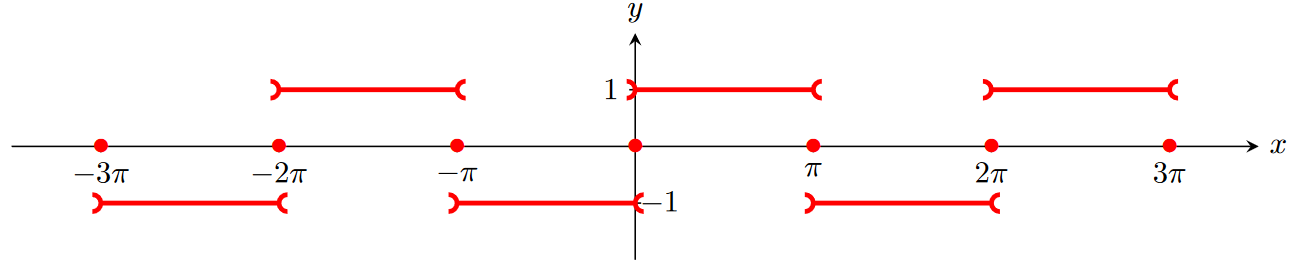

La fonction $f$ est 2$\pi$-périodique, valant 1 sur l'intervalle
$]0,\pi[$, $-1$ sur l'intervalle $]-\pi,0[$, et vérifiant
$f(-\pi)=f(0)=f(\pi)=0$. Le développement en série de Fourier $S_N(f)$
de la fonction $f$ est défini (dans sa variante réelle) par :

$$S_N(f) = a_0 + \sum_{n=1}^{N} a_n \cos(nt) + \sum_{n=1}^{N} b_n \sin(nt)$$

avec $\forall n \in \mathbb{N}^*$

$$a_0 = \frac{1}{2\pi} \int_{0}^{2\pi} f(t) dt$$
$$a_n = \frac{2}{2\pi} \int_{0}^{2\pi} f(t) \cos(nt) dt$$
$$b_n  = \frac{2}{2\pi} \int_{0}^{2\pi} f(t) \sin(nt) dt$$

1.  Montrer que $a_0 = 0$, et que $\forall n \geqslant 1$, $a_n=0$ et
    $b_n = \dfrac{4}{2\pi} \left( \dfrac{1 - \cos(n\pi)}{n} \right)$

2.  En étudiant la parité de $n$, en déduire que pour tout entier
    naturel $p$, $b_{2p} = 0$ et $b_{2p+1} = \dfrac{4}{(2p+1)\pi}$

3.  On rappelle le Théorème de Parseval :

    Soit $f$ une fonction continue par morceau, et 2$\pi$-périodique.
    Alors on a l'égalité suivante :
    $$\frac{1}{2\pi} \int_{0}^{2\pi}|f(t)|^2dt=  |a_0|^2 + \frac{1}{2} \left( \sum_{n=1}^{+\infty}|a_n|^2 + |b_n|^2 \right)$$
    vec $a_n$ et $b_n$ désignant les coefficients de Fourier réels de
    $f$.

    En appliquant le théorème de Parseval à la fonction $f$,
    montrer que $$\label{serie2}
    \sum_{p=0}^{+\infty} \dfrac{1}{(2p+1)^2} = \dfrac{\pi^2}{8}$$
    Cette série sera appelée la *série impaire*.

4.  En remarquant que
    $$\sum_{n=1}^{2N} \frac{1}{n^2} = \sum_{p=1}^{N} \frac{1}{(2p)^2} + \sum_{p=0}^{N-1} \frac{1}{(2p+1)^2}$$

    , en simplifiant l'expression puis en passant à la limite en
    l'infini, montrer que :

    $$\sum_{n=1}^{+\infty} \frac{1}{n^2} = \frac{1}{4} \sum_{n=1}^{+\infty} \frac{1}{n^2} + \frac{\pi^2}{8}$$

$$<=> \sum_{n=1}^{2N} \frac{1}{n^2} = \sum_{p=1}^{N} \frac{1}{(2p)^2} + \frac{\pi^2}{8}$$
$$<=> \sum_{n=1}^{+\infty} \frac{1}{n^2} = \sum_{p=1}^{+\infty} \frac{1}{(2p)^2} + \frac{\pi^2}{8}$$
$$<=> \sum_{n=1}^{+\infty} \frac{1}{n^2} = \sum_{p=1}^{+\infty} \frac{1}{4p^2} + \frac{\pi^2}{8}$$
$$<=> \sum_{n=1}^{+\infty} \frac{1}{n^2} = \frac{1}{4} \sum_{n=1}^{+\infty} \frac{1}{n^2} + \frac{\pi^2}{8}$$

5.  Finalement, en déduirela valeur de la *série paire*

    $$\label{serie1}
     \sum_{n=1}^{+\infty} \frac{1}{n^2}$$

$$ \sum_{n=1}^{+\infty} \frac{1}{n^2} = \frac{1}{4} \sum_{n=1}^{+\infty} \frac{1}{n^2} + \frac{\pi^2}{8}$$
$$<=> \frac{3}{4} \sum_{n=1}^{+\infty} \frac{1}{n^2} = \frac{\pi^2}{8} $$
$$<=> \sum_{n=1}^{+\infty} \frac{1}{n^2} = \frac{\pi^2}{6} $$

Implémentations
---------------

1.  Implémenter une fonction *SerieInvCarres(N)* renvoyant calculant les
    $N$ premiers termes de la somme $$\sum_{n=1}^{N} \frac{1}{n^2}$$

In [9]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

In [6]:
def SerieInvCarres(N):
    sum = 0
    for n in range(1,N+1):
        sum = sum+1/(n*n)
    print(sum)
SerieInvCarres(300)

1.6416062828976226


2.  En utilisant l'équation *série paire*, implémenter une fonction
    *MethodeSerieInvCarres(N)* renvoyant une approximation du nombre
    $\pi$.

In [30]:
def MethodeSerieInvCarresPair(N):
    appr_pi = 0
    for n in range(1,N+1):
        appr_pi = appr_pi+1/(n*n)
    return math.sqrt(appr_pi*6)
MethodeSerieInvCarresPair(4000)

3.141353941945064

3.  Implémenter une fonction *SerieInvCarresImparis(N)* renvoyant
    calculant les $N$ premiers termes de la somme
    $$\sum_{n=0}^{N} \frac{1}{(2n+1)^2}$$

In [11]:
def SerieInvCarresImpair(N):
    sum_imp = 0.0
    for n in range(0,N):
        sum_imp = sum_imp+(1/math.pow((2*n+1),2))
    print(sum_imp)
SerieInvCarresImpair(4000)

1.2336380501364983


4.  En utilisant l'équation *série impaire*, implémenter une fonction
    *MethodeSerieInvCarresImparis(N)* renvoyant une approximation du
    nombre $\pi$.

In [29]:
def MethodeSerieInvCarresImpair(N):
    appr_pi = 0.0
    for n in range(0,N):
        appr_pi = appr_pi+(1/math.pow((2*n+1),2))
    return math.sqrt(appr_pi*8)
MethodeSerieInvCarresImpair(3000)

3.1414865485035737

5.  Pour chacune des deux méthodes ci-dessus, tracer la courbe
    représentant l'évolution de $|MethodeSerieXXX(N) - \pi|$ en fonction
    de $N$

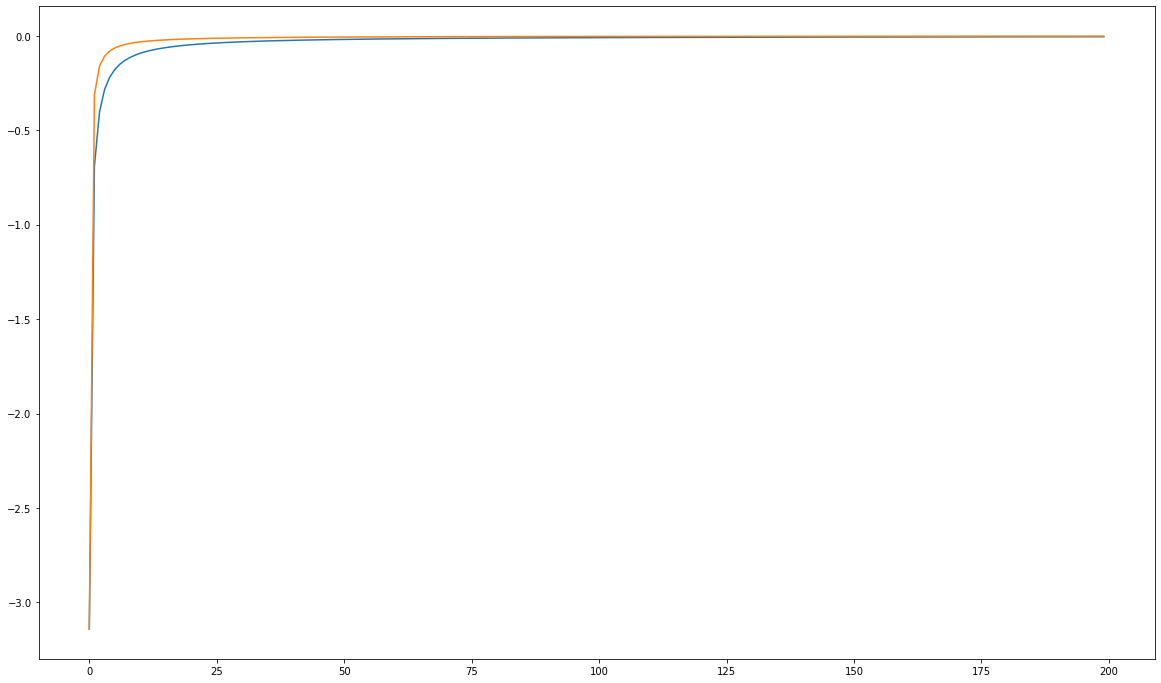

In [23]:
def buildPlot(n):
    pointPlotPair = []
    pintPlotImp = []
    last = 0.0
    fig = plt.figure(figsize=(20, 12))
    ax = fig.add_subplot(111)
    for n in range(0,n):
        last = MethodeSerieInvCarresPair(n)-math.pi
        pointPlotPair.append(last)
        last = MethodeSerieInvCarresImpair(n)-math.pi
        pintPlotImp.append(last)
    ax.plot(pointPlotPair)
    ax.plot(pintPlotImp)
    fig.savefig('graph.png')
buildPlot(200)

6.  Pour chacune des deux méthodes ci-dessus, combien faut-il de termes
    $N$ dans la somme pour obtenir une approximation de $\pi$ avec une
    précision de l'ordre de $10^{-4}$ ?

In [25]:
def approx():
    result = 1
    result2 = 1
    counter = -1
    counter2 = -1
    while result <= math.trunc(math.pi*10**4)*10**-4:
        counter = counter+1
        result = MethodeSerieInvCarresPair(counter)
    while result2 <= math.trunc(math.pi*10**4)*10**-4:
        counter2 = counter2+1
        result2 = MethodeSerieInvCarresImpair(counter2)
    print(result,result2)
    print(counter,counter2)
approx()

3.1415000080658166 3.1415000125603303
10307 3436


7.  Le célèbre mathématicien Ramanujan proposa, de manière
    quasi-magique, un certain nombre de formules permettant d'approximer
    le nombre $\pi$. Une des formules proposées peut s'énoncer comme
    suit :
    $${\frac {1}{\pi }}={\frac {2{\sqrt {2}}}{9801}}\displaystyle \sum _{n=0}^{\infty }{\frac {(4n)!}{(n!)^{4}}}\times {\frac {1103+26390n}{(4\times 99)^{4n}}}$$
    Implémenter une fonction *MethodeSerieRamanujan(N)*, basée sur cette
    équation, renvoyant une approximation du nombre $\pi$.

In [28]:
def fonctiondroite(n):
    return (1103+(26390*n))/math.pow((4*99),4*n)

def fonctiongauche(n):
    return math.factorial(4*n)/math.pow(math.factorial(n),4)
    
def MethodeSerieRamanujan(N):
    res = 0
    for i in range(0,N):
        res = res + (fonctiondroite(i) * fonctiongauche(i))
    res =  1/(((2*math.sqrt(2))/9801) * res)
    return res
MethodeSerieRamanujan(3)

3.141592653589793

8.  Déterminer combien cette méthode fournit de décimales
    supplémentaires à $\pi$ à chaque nouveau terme de la série.

In [31]:
def verifyRamanujan(n):
    approx_pi = "3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679"
    tabRam = str(MethodeSerieRamanujan(n))
    i=2
    try:
        while list(approx_pi)[i] == list(tabRam)[i]:
            print("approx_pi: "+list(approx_pi)[i]+" tabRam: "+list(tabRam)[i])
            i = i+1
    except  IndexError:
        print("Float out of range !")
    print(i-2)
    print(tabRam+"\n"+approx_pi+"\n\n")
    
verifyRamanujan(1)
verifyRamanujan(2)
verifyRamanujan(3)

approx_pi: 1 tabRam: 1
approx_pi: 4 tabRam: 4
approx_pi: 1 tabRam: 1
approx_pi: 5 tabRam: 5
approx_pi: 9 tabRam: 9
approx_pi: 2 tabRam: 2
6
3.1415927300133055
3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679


approx_pi: 1 tabRam: 1
approx_pi: 4 tabRam: 4
approx_pi: 1 tabRam: 1
approx_pi: 5 tabRam: 5
approx_pi: 9 tabRam: 9
approx_pi: 2 tabRam: 2
approx_pi: 6 tabRam: 6
approx_pi: 5 tabRam: 5
approx_pi: 3 tabRam: 3
approx_pi: 5 tabRam: 5
approx_pi: 8 tabRam: 8
approx_pi: 9 tabRam: 9
approx_pi: 7 tabRam: 7
approx_pi: 9 tabRam: 9
approx_pi: 3 tabRam: 3
15
3.1415926535897936
3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679


approx_pi: 1 tabRam: 1
approx_pi: 4 tabRam: 4
approx_pi: 1 tabRam: 1
approx_pi: 5 tabRam: 5
approx_pi: 9 tabRam: 9
approx_pi: 2 tabRam: 2
approx_pi: 6 tabRam: 6
approx_pi: 5 tabRam: 5
approx_pi: 3 tabRam: 3
approx_pi: 5 tabRam: 5
approx_pi: 8 tabRam: 8
approx_pi: 

9.  Discuter et comparer l'efficacité des trois méthodes présentées
    ci-dessus. Quels peuvent être les avantages et les inconvénients de
    chacune ?

   * Les Méthodes utilisant les *séries paire* et les *séries impaire* ont peu d'avantage, en effet elles sont autant complexe et elles demande beaucoup plus de moyen que la *méthode de Ramanujan* . Pour trouver une approximation à $ 10^{-4}$ il nous a fallu $ 10 307 $ itérations avec la méthode  des *séries Pair* et $ 3436 $ itérations avec la méthode des *séries Impair*. Alors que avec la *méhode de Ramanujan* il nous a fallu seulement $1$ itérations pour trouver $\pi$ avec une approximation à $ 10^{-6}$ 
   

   * Un des défauts que peut présenter la *méthode de Ramanujan* est sa complexité mathématique. C'est donc une méthode difficile à manipuler et comprendre mais aussi a implémenter en informatique. En effet au bout de la $ 3^{ème}$ itération le nombre de décimals dépasse 15 ce qui pose problème à cause de la gestion des *floats* par python et les compilateurs en général.

Méthode de Monte-Carlo
======================

\"Le terme \"méthode de Monte-Carlo\", ou \"méthode Monte-Carlo\",
désigne une famille de méthodes algorithmiques visant à calculer une
valeur numérique approchée en utilisant des procédés aléatoires,
c'est-à-dire des techniques probabilistes. Le nom de ces méthodes, qui
fait allusion aux jeux de hasard pratiqués à Monte-Carlo, a été inventé
en 1947 par Nicholas Metropolis.\"

 

On se propose d'utiliser cette méthode pour obtenir une approximation du
nombre $\pi$. Considérons $\mathcal{D}$ la portion de disque définie par :

$$\mathcal{D} = \{ (x,y) \in \mathbb{R}^{+} ~|~ x^2 + y^2 \leqslant 1 \}$$

Le principe de la méthode est de choisir aléatoirement un grand nombre
de points dans le carré $[0,1]\times [0,1]$ et d'observer combien de ces
points se situent dans le quart de disque $\mathcal{D}$. On notera $n$
le nombre de points tirés, et $k_n$ le nombre de ces points qui se
situent dans $\mathcal{D}$.

1.  Déterminer l'aire de la portion de disque $\mathcal{D}$. En se
    basant sur le calcul précédent, quel à votre avis la valeur de
    $\lim\limits_{n \to \infty} \frac{k_n}{n}$ ?

2.  Implémenter une fonction *Tirage(n)* permettant de tirer $n$ points
    dans $[0,1]\times [0,1]$ et de calculer $\frac{k_n}{n}$.

In [1]:
def Tirage(n):
    pointPlotx = []
    pointPloty = []
    kn=0
    for i in range(0,n):
        pointPlotx.append(random.uniform(0,1))
        pointPloty.append(random.uniform(0,1))
        if math.pow(pointPlotx[i],2)+math.pow(pointPloty[i],2) <= 1:
            kn=kn+1
    res = kn/n
    return res
Tirage(2000)

NameError: name 'random' is not defined

3.  Représenter le carré $[0,1]\times [0,1]$, le disque $\mathcal{D}$
    (ou seulement le cercle associé), et le tirage des $n$ points, en
    colorant de manière différente les points à l'intérieur et à
    l'extérieur du disque $\mathcal{D}$.

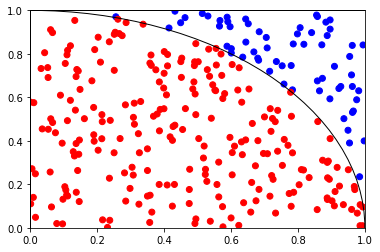

In [35]:
def Tirage2(n):
    pointPlotx = []
    pointPloty = []
    for i in range(0,n):
        pointPlotx.append(random.uniform(0,1))
        pointPloty.append(random.uniform(0,1))
    return [pointPlotx,pointPloty]

def buildPlotMonteCarlo(n):
    plt.axes()
    plt.gca().set_xlim([0,1])
    plt.gca().set_ylim([0,1])
    circle = plt.Circle((0, 0),1,fill = False)
    rect = plt.Rectangle((0,0),1,1,fill = False)
    plt.gca().add_patch(circle)
    plt.gca().add_patch(rect)
    nuagePoint = Tirage2(n)
    colorTab = []
    for i in range(0,n):
        if math.pow(nuagePoint[0][i],2)+math.pow(nuagePoint[1][i],2) <= 1:
            colorTab.append("r")
        else:
            colorTab.append("b")
    plt.scatter(nuagePoint[0],nuagePoint[1],c = colorTab)
    plt.show()
buildPlotMonteCarlo(300)

4.  Implémenter une fonction *MonteCarlo(n)* renvoyant une approximation
    de $\pi$.

In [1]:
def MonteCarlo(n):
    return (Tirage(n)*4)
MonteCarlo(3000)

NameError: name 'Tirage' is not defined

5.  Représenter sous forme de nuage de points la quantité
    $|MonteCarlo(n) - \pi|$ en fonction de $n$. La méthode
    converge-t-elle ? Dans quel sens ?

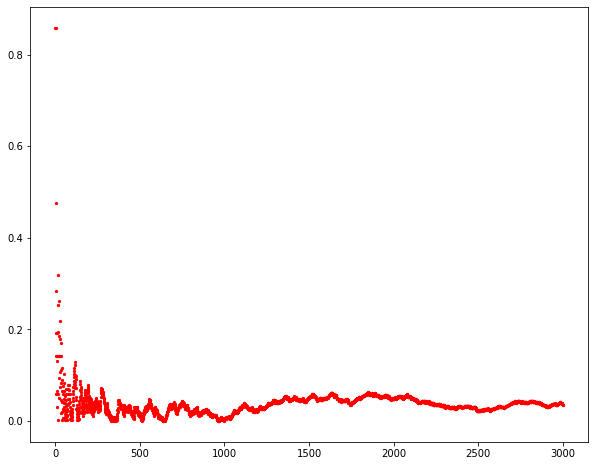

In [41]:
def MonteCarloApprox(n):
    mytables = Tirage2(n)
    myTablesValueQuotien = []
    for j in range(1,n):
        myTablesValueQuotien.append(resQ(j,mytables[0],mytables[1]))
    pointPlotMC = []
    fig = plt.figure(figsize=(10, 8))
    axe = fig.add_subplot(111)
    for i in range(1,n):
        pointPlotMC.append(abs(myTablesValueQuotien[i-1]-math.pi))
    axe.scatter(range(1,n),pointPlotMC,c="red",s=5)
    plt.show()
MonteCarloApprox(3000)

6.  Combien faut-il tirer de points $n$ (en moyenne) pour obtenir une
    approximation de $\pi$ avec une précision de l'ordre de $10^{-4}$ ?

In [42]:
def avgApproxPi():
    res=0
    counter=0
    while math.trunc(res*10**4)*10**-4 != math.trunc(math.pi*10**4)*10**-4:
        counter = counter+1
        res=MonteCarlo(counter)
    return counter

def avgCounter(nb):
    #(nb de fois où on cherche l'approx de pi)
    total=0
    for i in range(0,nb):
        counter=avgApproxPi()
        total=total+counter
    print(total/nb)
avgCounter(10)

1206.8


7.  Quels sont les inconvénients et les avantages de cette méthode par
    rapport aux méthodes des séries ?

* Le gros inconveniant de cette méthode est qu'on ne peut pas être sur qu'un tirage nous donnera $\pi$ à $10^{-4}$.
En effet, et comme vu sur le graphique réalisé plus haut, le resultat de cette méthode se rapproche de $\pi$ sans y être forcément égal. Ainsi on ne peut être sur de trouver $\pi$ au bout de n itérations, contrairement aux méthodes des séries.
Elle est cependant mathématiquement parlant beaucoup plus simple que la méthode des séries, se servant de calculs basiques, basé sur des points aléatoires.

Ouverture
=========

-   Citer au moins une autre méthode (basée sur un principe mathématique
    différent) permettant d'approximer le nombre $\pi$ et expliquer
    brièvement son principe.

-   (Bonus -- Pour les plus passionnés) Imaginer une nouvelle méthode
    permettant d'obtenir une approximation du nombre $\pi$.

Rendu du projet
===============

Le travail sur ce projet est à faire par binôme (2 personnes maximum).
Le travail sera restitué sous la forme d'un Notebook.
Le projet est à rendre sur Moodle.



Le Notebook doit répondre à toutes les questions
posées dans l'énoncé, implémenter les algorithmes demandés,
et si cela s'avère nécessaire expliquer comment ces algorithmes
ont été implémentés en pratique.
Le Notebook se terminera par une discussion des résultats
et une conclusion.
La qualité, propreté et clarté de la rédaction seront pris en compte.